In [52]:
#  core
import pandas as pd
import numpy as np
import joblib
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
# data preparation
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
# selection
from sklearn.model_selection import train_test_split, GridSearchCV
# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
# metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Data Analysis Pepeline:
1. Data Exploration
2. Data Cleaning
3. EDA (Visualisation)
4. Feature Engineering
5. Feature Selection
6. Data Preprocessing (Scaling & Encoding)
7. Modeling
8. Model Evaluation & Optimization
9. Deployment & Interpretation

# **STEP 1: Data Exploration**

## **Column Descriptions**

> Patient_ID: Unique identifier for each patient.

> Age: Age of the patient (in years).

> Gender: Gender of the patient (Male/Female).

> Tumor_Type: Type of tumor (Benign/Malignant).

> Tumor_Size: Size of the tumor (in centimeters).

> Location: The part of the brain where the tumor is located (e.g., Frontal, Temporal).

> Histology: The histological type of the tumor (e.g., Astrocytoma, Glioblastoma).

> Stage: The stage of the tumor (I, II, III, IV).

> Symptom_1: The first symptom observed (e.g., Headache, Seizures).

> Symptom_2: The second symptom observed.

> Symptom_3: The third symptom observed.

> Radiation_Treatment: Whether radiation treatment was administered (Yes/No).

> Surgery_Performed: Whether surgery was performed (Yes/No).

> Chemotherapy: Whether chemotherapy was administered (Yes/No).

> Survival_Rate: The estimated survival rate of the patient (percentage).

> Tumor_Growth_Rate: The growth rate of the tumor (cm per month).

> Family_History: Whether the patient has a family history of brain tumors (Yes/No).

> MRI_Result: The result of the MRI scan (Positive/Negative).

> Follow_Up_Required: Whether follow-up is required (Yes/No).

## **Descriptive Statistics**

> Descriptive statistics summarize and describe the key features of a dataset.

In [3]:
# load the dataset
df = pd.read_csv("C:/Users/ARZ/Desktop/brain_tumor_prediction/brain_tumor.csv")

In [ ]:
def dataset_snapshot(df):
    head = df.head(3)
    tail = df.tail(3)
    sample = df.sample(3)
    return pd.concat([head, tail, sample])

dataset_snapshot(df)

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
19997,19998,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No
19999,20000,61,Male,Benign,9.716768,Temporal,Medulloblastoma,I,Vision Issues,Seizures,Nausea,No,No,No,47.433468,2.464077,Yes,Negative,Yes
9266,9267,47,Male,Benign,4.678594,Parietal,Meningioma,II,Vision Issues,Nausea,Vision Issues,No,Yes,No,65.624895,0.581779,No,Positive,No
11914,11915,48,Female,Benign,4.473455,Occipital,Medulloblastoma,II,Vision Issues,Nausea,Seizures,Yes,No,Yes,46.430826,0.561825,No,Positive,Yes
8359,8360,50,Male,Benign,6.545947,Frontal,Meningioma,III,Vision Issues,Headache,Seizures,Yes,No,No,41.655054,1.998174,Yes,Positive,No


In [33]:
def quick_overview(df):
    return pd.DataFrame({
        "dtype": df.dtypes,
        "nunique": df.nunique(),
        "missing": df.isnull().sum()
    }).reset_index().rename(columns={"index": "column"})
quick_overview(df)

,column,dtype,nunique,missing
0,Patient_ID,int64,20000,0
1,Age,int64,60,0
2,Gender,object,2,0
3,Tumor_Type,object,2,0
4,Tumor_Size,float64,20000,0
5,Location,object,4,0
6,Histology,object,4,0
7,Stage,object,4,0
8,Symptom_1,object,4,0
9,Symptom_2,object,4,0


In [43]:
def check_df(df, target=None, head=3):
    pd.set_option("display.max_columns", None)
    pd.set_option("display.width", 500)

    print("#################### SHAPE ########################")
    print(f"🔹 Rows: {df.shape[0]} | 🔹 Columns: {df.shape[1]}\n")
    
    print("#################### INFO #########################")
    print(df.info(), "\n")
 
    print("################## DESCRIPTIVE STATS (numerical) ##################")
    display(df.describe().T.style.background_gradient(cmap='PuBu'))
    
    print("################## DESCRIPTIVE STATS (categorical) ##################")
    display(df.describe(include='object').T.style.background_gradient(cmap='Oranges'))
    
    print("################## DUPLICATES ##################")
    print(f"🔁 Duplicate Rows: {df.duplicated().sum()}\n")

    if target and target in df.columns:
        print("############ TARGET DISTRIBUTION ############")
        print(df[target].value_counts(), "\n")

check_df(df, target= 'Tumor_Type')

#################### SHAPE ########################
🔹 Rows: 20000 | 🔹 Columns: 19

#################### INFO #########################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  C

,count,mean,std,min,25%,50%,75%,max
Patient_ID,20000.000000,10000.500000,5773.647028,1.000000,5000.750000,10000.500000,15000.250000,20000.000000
Age,20000.000000,49.433700,17.389296,20.000000,34.000000,49.000000,65.000000,79.000000
Tumor_Size,20000.000000,5.236552,2.754359,0.500410,2.836686,5.200675,7.624299,9.999420
Survival_Rate,20000.000000,70.131699,17.270834,40.002386,55.224439,70.305066,85.043395,99.998125
Tumor_Growth_Rate,20000.000000,1.547701,0.835995,0.100017,0.830433,1.541821,2.262484,2.999835


################## DESCRIPTIVE STATS (categorical) ##################


,count,unique,top,freq
Gender,20000,2,Female,10016
Tumor_Type,20000,2,Malignant,10030
Location,20000,4,Temporal,5118
Histology,20000,4,Glioblastoma,5068
Stage,20000,4,II,5093
Symptom_1,20000,4,Headache,5045
Symptom_2,20000,4,Seizures,5054
Symptom_3,20000,4,Seizures,5027
Radiation_Treatment,20000,2,Yes,10021
Surgery_Performed,20000,2,Yes,10060


################## DUPLICATES ##################
🔁 Duplicate Rows: 0

############ TARGET DISTRIBUTION ############
Tumor_Type
Malignant    10030
Benign        9970
Name: count, dtype: int64 



In [44]:
def show_unique_categories(df):
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        print(f"{col} ({df[col].nunique()} unique): {df[col].unique()[:5]}{'...' if df[col].nunique() > 5 else ''}")

show_unique_categories(df)

Gender (2 unique): ['Male' 'Female']
Tumor_Type (2 unique): ['Malignant' 'Benign']
Location (4 unique): ['Temporal' 'Parietal' 'Frontal' 'Occipital']
Histology (4 unique): ['Astrocytoma' 'Glioblastoma' 'Meningioma' 'Medulloblastoma']
Stage (4 unique): ['III' 'II' 'I' 'IV']
Symptom_1 (4 unique): ['Vision Issues' 'Headache' 'Seizures' 'Nausea']
Symptom_2 (4 unique): ['Seizures' 'Headache' 'Vision Issues' 'Nausea']
Symptom_3 (4 unique): ['Seizures' 'Nausea' 'Headache' 'Vision Issues']
Radiation_Treatment (2 unique): ['No' 'Yes']
Surgery_Performed (2 unique): ['No' 'Yes']
Chemotherapy (2 unique): ['No' 'Yes']
Family_History (2 unique): ['No' 'Yes']
MRI_Result (2 unique): ['Positive' 'Negative']
Follow_Up_Required (2 unique): ['Yes' 'No']


# **STEP 2: Data Cleaning**

### **1️⃣Handle missing values**

In [5]:
# inspecting null values
missing_percentage = (df.isnull().sum() / len(df)) * 100
for col, perc in missing_percentage.items():
    print(f"{col}: {perc:.2f}%")

Patient_ID: 0.00%
Age: 0.00%
Gender: 0.00%
Tumor_Type: 0.00%
Tumor_Size: 0.00%
Location: 0.00%
Histology: 0.00%
Stage: 0.00%
Symptom_1: 0.00%
Symptom_2: 0.00%
Symptom_3: 0.00%
Radiation_Treatment: 0.00%
Surgery_Performed: 0.00%
Chemotherapy: 0.00%
Survival_Rate: 0.00%
Tumor_Growth_Rate: 0.00%
Family_History: 0.00%
MRI_Result: 0.00%
Follow_Up_Required: 0.00%


### **2️⃣ Remove duplicates**

In [6]:
# let's check duplicated values 
df.duplicated().sum()

np.int64(0)

### **3️⃣ Fix incorrect/inconsistent data**

> Deals with wrong, inconsistent, or messy values (e.g., typos, inconsistent formats, leading/trailing spaces).

In [7]:
# Remove Leading/Trailing Spaces from Text Columns
text_columns = df.select_dtypes(include=['object']).columns
df[text_columns] = df[text_columns].apply(lambda x: x.str.strip())
# confirm
df.select_dtypes(include=['object']).head(3)

,Gender,Tumor_Type,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Family_History,MRI_Result,Follow_Up_Required
0,Male,Malignant,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,No,Positive,Yes
1,Male,Benign,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,Yes,Positive,Yes
2,Male,Benign,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,No,Negative,No


### **4️⃣ Remove features**

In [ ]:
# since we will be using sequential modeling to predict based on two features, we will not remove anything for now.

In [ ]:
# now let's save the cleaned dataset for the ease of further analysis
df.to_csv("brain_tumor_cleaned.csv", index=False)

# **STEP 3: EDA**

> EDA helps understand the distribution, relationships, and trends in data before applying machine learning or advanced analysis.

In [3]:
# reading the cleaned dataset for further analysis
df_cleaned = pd.read_csv("brain_tumor_cleaned.csv")
df_cleaned.head(3)

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No


### **1️⃣ Outlier Analysis**

In [ ]:
df_cleaned.describe().style.background_gradient(cmap='BrBG')

In [ ]:
# How to Identify Outliers?
numeric_cols = ['Age', 'Tumor_Size', 'Survival_Rate', 'Tumor_Growth_Rate']

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)

IQR = Q3 - Q1
lower_band = Q1 - 1.5 * IQR
upper_band = Q3 + 1.5 * IQR

outliers_iqr = (df[numeric_cols] < lower_band) | (df[numeric_cols] > upper_band)
outlier_rows = df[outliers_iqr.any(axis=1)]
outlier_counts = outliers_iqr.sum()
outlier_counts

In [ ]:
# visualize outliers

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=15)
plt.title("Boxplot of Numerical Columns (Before Capping)")
plt.show()

### **2️⃣ Distribution Analysis**

In [ ]:
# Histogram - Checking Data Distribution

# 📊 Histogram Insights
# Age: Looks slightly right-skewed, more patients in younger/mid-age groups.
# Tumor_Size: Centered with a somewhat normal distribution, slight right skew.
# Survival_Rate: Peaks around the 50–60 range, long tail on both sides.
# Tumor_Growth_Rate: Slightly skewed, but fairly concentrated — may not need transformation.

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
features = ['Age', 'Tumor_Size', 'Survival_Rate', 'Tumor_Growth_Rate']
titles = ['Age Distribution', 'Tumor Size Distribution', 'Survival Rate Distribution', 'Tumor Growth Rate Distribution']

for ax, feature, title in zip(axes.flatten(), features, titles):
    sns.histplot(df[feature], kde=True, bins=30, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(title, fontsize=13)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

plt.suptitle("Enhanced Distribution Plots with KDE", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Violin Plots - show distribution + density + IQR in one

# Violin Plots:
# Combine KDE + boxplot:
# Wider sections show where most data is concentrated.
# You see distribution shape and interquartile range (IQR).
# Clear asymmetry in Tumor_Growth_Rate and Age.
# Good for visual comparison in future grouped by Tumor_Type or Stage.

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 4, i)
    sns.violinplot(y=df[col], color='lightblue',inner='quartile')
    plt.title(col)
plt.tight_layout()
plt.suptitle("Violin Plots of Numeric Variables", y=1.05, fontsize=14)
plt.show()

In [ ]:
# KDE Plot:
# Smooth distribution lines help identify skewness and peak areas.
# Tumor_Growth_Rate and Tumor_Size are slightly right-skewed.
# Survival_Rate shows a denser center between 45–60.
# Age spans a broad range but is slightly skewed toward younger patients.

plt.figure(figsize=(10,6))
for col in numeric_cols:
    sns.kdeplot(data=df, x=col, label=col, fill=True, alpha=0.4)
plt.title("Filled KDE Plot of Numeric Variables")
plt.legend()
plt.show()

### **3️⃣ Correlation & Relationships**
in this step, we explore how different components relate to each other. This helps identify patterns, dependencies, and potential insights.

In [8]:
# correlation matrix
# ✔ Shows numerical correlations between salary components.
# ✔ Values near +1: Strong positive relationship (e.g., TotalPay and TotalPayBenefits).
# ✔ Values near -1: Strong negative correlation (none observed in this case).
# ✔ Values near 0: No strong relationship (e.g., Year and BasePay).

# df_cleaned.select_dtypes(['float64','int64']).corr()
numeric_cols = ['Age', 'Tumor_Size', 'Survival_Rate', 'Tumor_Growth_Rate']
correlation_matrix = df[numeric_cols].corr()
correlation_matrix

# 🔹 Interpretation:
# No extremely strong correlations found

,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate
Age,1.000000,-0.014385,-0.014825,-0.009853
Tumor_Size,-0.014385,1.000000,0.003295,0.004347
Survival_Rate,-0.014825,0.003295,1.000000,-0.006825
Tumor_Growth_Rate,-0.009853,0.004347,-0.006825,1.000000


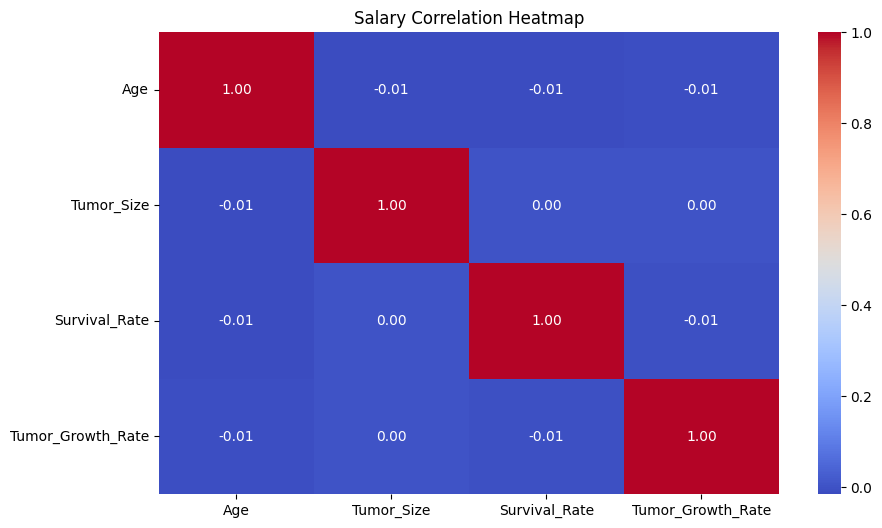

In [9]:
# correlation matrix with a heatmap
# ✔ Dark red = strong positive correlation.
# ✔ Dark blue = strong negative correlation (none found here).
# ✔ Lighter colors = weaker relationships.
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Salary Correlation Heatmap")
plt.show()

# 🔹 Interpretation
# Minor positive correlation between:
# - Tumor_Size & Tumor_Growth_Rate
# - Survival_Rate & Age (very slight)
# No multicollinearity issues
# Features are fairly independent, which is good for mod

In [ ]:
# Pairplot (Multiple Salary Variables)
# ✔ Useful for finding strong vs. weak relationships between multiple variables.
# ✔ Shows relationships between all key numerical salary components.
# ✔ If a pattern emerges → strong correlation.
# ✔ If random scatter → weak or no correlation.

sns.pairplot(df_cleaned[numeric_cols])
plt.show()

# 🔹 Interpretation:
# No clear linear trends
# Distributions are stable
# No visually obvious clustering

In [ ]:
# 4. Grouped Mean Comparison: Tumor_Type vs Numeric Variables
grouped_by_tumor = df.groupby("Tumor_Type")[numeric_cols].mean()
# 5. Bar plots to show mean comparison by Tumor_Type
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for ax, col in zip(axes.flatten(), numeric_cols):
    sns.barplot(data=df, x="Tumor_Type", y=col, ax=ax, palette='viridis')
    ax.set_title(f"{col} by Tumor Type")
    ax.set_xlabel("Tumor Type")
    ax.set_ylabel(f"Mean {col}")

plt.suptitle("Comparison of Numeric Features by Tumor Type", fontsize=16)
plt.tight_layout()
plt.show()

grouped_by_tumor

# Interpretation:
# Surprisingly, no major differences in average values between benign and malignant tumors
# You’ll need to rely on combinations of features rather than individual predictors for classification

### **4️⃣ Categorical Feature Distribution**
- In this step, we analyze **how categorical values are distributed**.

In [ ]:
# Define main categorical columns to explore
categorical_cols = [
    'Gender', 'Tumor_Type', 'Location', 'Histology', 'Stage',
    'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy',
    'Family_History', 'MRI_Result', 'Follow_Up_Required'
]

NameError: name 'categorical_cols' is not defined

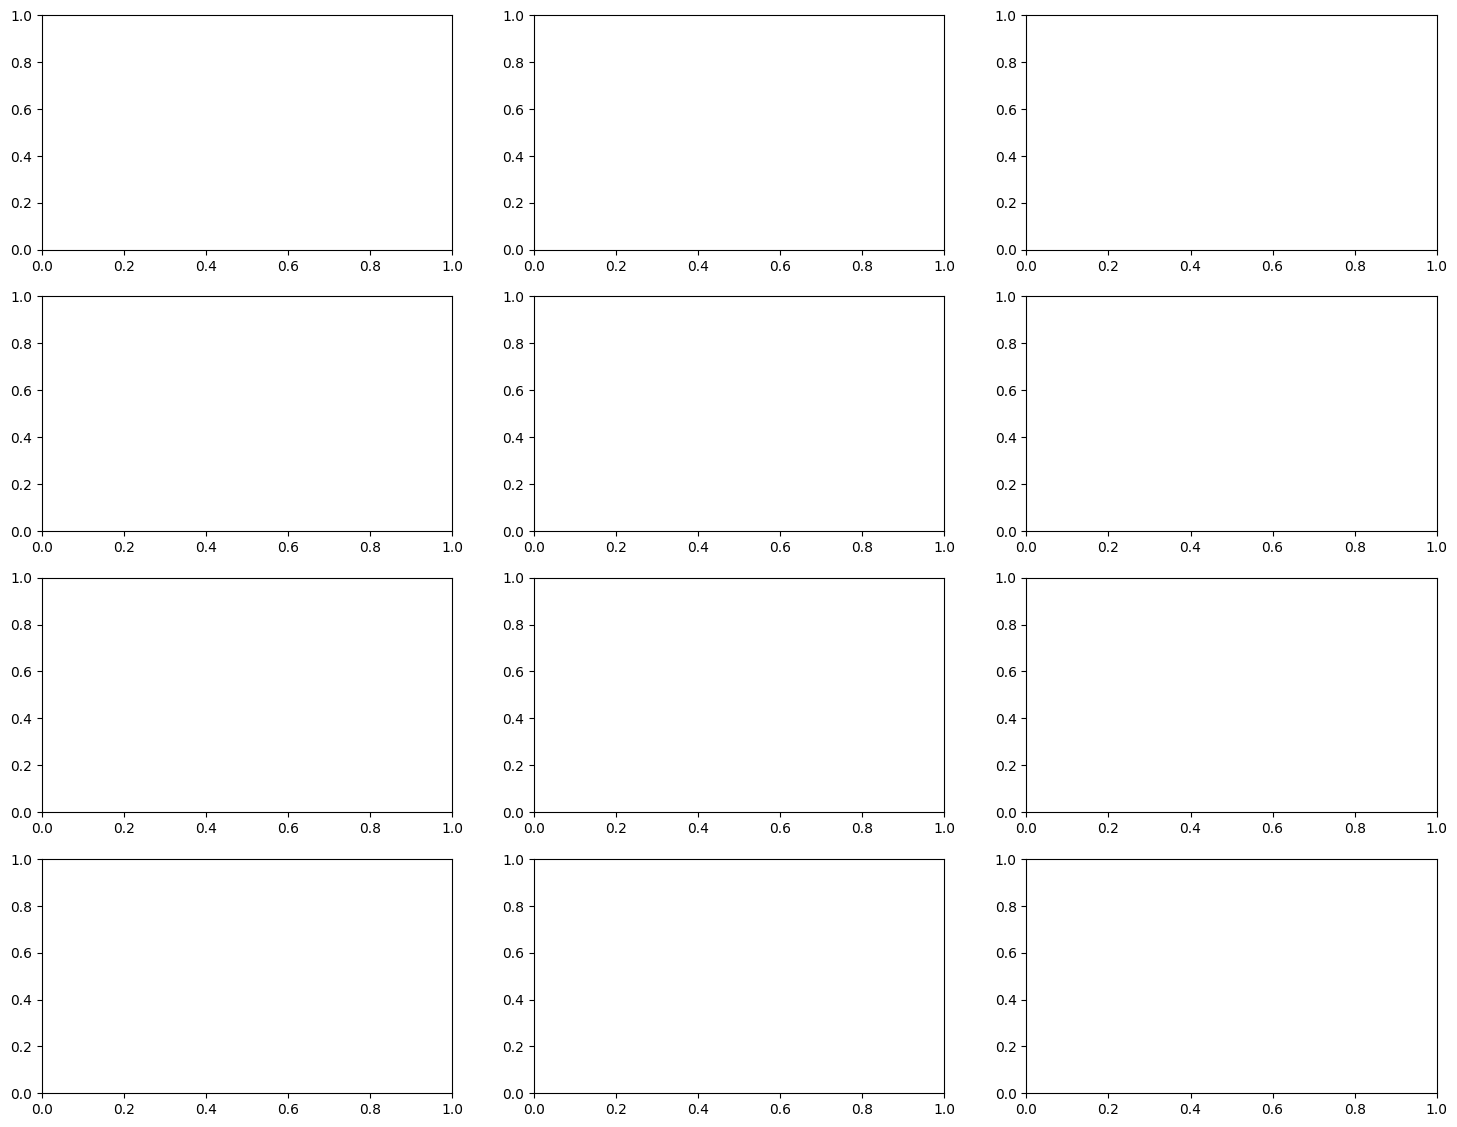

In [10]:
# 1. Count plots for each categorical column
fig, axes = plt.subplots(4, 3, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f"Count of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)
    
# interpretation:
# balanced dataset – this is a rare and ideal scenario for classification models.
# These features are well-suited for encoding later.

In [ ]:
# 2. Percentage breakdown for each category
percentages = {
    col: (df[col].value_counts(normalize=True) * 100).round(2)
    for col in categorical_cols
}

percentages

In [ ]:
# how each categorical features interact with our target? Tumor_type

# Plot countplot for each categorical feature by Tumor_Type
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Tumor_Type', ax=axes[i], palette='Set1')
    axes[i].set_title(f"Tumor Type by {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)

# Hide unused subplot
for j in range(len(categorical_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Tumor Type vs Categorical Features", fontsize=18)
plt.tight_layout()
plt.show()

# Gender, Location, Histology, Stage, Radiation_Treatment, and others:
# The red and blue bars are almost equal within each category.
# This means no strong categorical variable alone separates malignant from benign tumors.


# **STEP 4: Feature Engineering**
- In this step, we create new meaningful features from existing data.
- We ensure that our dataset has the right inputs for modeling.

### **1. Combine Symptom Columns**

In [7]:
# Instead of 3 separate columns: Symptom_1, Symptom_2, Symptom_3
# ➡️ Create a single Symptom_Set feature (e.g., count unique symptoms or join as string)

# ✅ This feature captures the exact symptom combination a patient has.
df_cleaned['Symptom_Combo'] = df_cleaned['Symptom_1'] + '_' + df_cleaned['Symptom_2'] + '_' + df_cleaned['Symptom_3']
# ✅ This feature shows the diversity of symptoms a patient presents with.
df_cleaned['Symptom_Count'] = df_cleaned[['Symptom_1', 'Symptom_2', 'Symptom_3']].nunique(axis=1)
df_cleaned[['Symptom_Combo','Symptom_Count']]

,Symptom_Combo,Symptom_Count
0,Vision Issues_Seizures_Seizures,2
1,Headache_Headache_Nausea,2
2,Vision Issues_Headache_Seizures,3
3,Vision Issues_Seizures_Headache,3
4,Headache_Headache_Seizures,2
...,...,...
19995,Seizures_Nausea_Vision Issues,3
19996,Headache_Headache_Vision Issues,2
19997,Seizures_Vision Issues_Nausea,3
19998,Seizures_Headache_Vision Issues,3


### **2. Create Treatment Intensity Score**

In [8]:
df_cleaned['Treatment_Score'] = df_cleaned[['Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy']].apply(lambda row: sum(row == 'Yes'), axis=1)
# This gives a number:
# 0 = no treatment, 1 = mild, 2 = moderate, 3 = intensive
df_cleaned[['Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy','Treatment_Score']]

,Radiation_Treatment,Surgery_Performed,Chemotherapy,Treatment_Score
0,No,No,No,0
1,Yes,Yes,Yes,3
2,No,No,No,0
3,Yes,No,Yes,2
4,No,No,Yes,1
...,...,...,...,...
19995,No,No,Yes,1
19996,Yes,Yes,No,2
19997,No,No,Yes,1
19998,Yes,Yes,Yes,3


In [9]:
df_cleaned.to_csv("brain_tumor_features_added.csv",index=False)

# **STEP 4.5: Advanced Feature Engineering**

In [10]:
# In this step, we create advanced or domain-specific features
# ➤ These are combinations or transformations of existing features
# ➤ Goal: to expose hidden patterns and improve model performance

df_features = pd.read_csv("brain_tumor_features_added.csv")
df_features.head(3)

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,...,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required,Symptom_Combo,Symptom_Count,Treatment_Score
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,...,No,No,51.312579,0.111876,No,Positive,Yes,Vision Issues_Seizures_Seizures,2,0
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,...,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes,Headache_Headache_Nausea,2,3
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,...,No,No,47.072221,1.884228,No,Negative,No,Vision Issues_Headache_Seizures,3,0


In [11]:
# ✅ Feature 1: Risk Index
# ➤ Multiplies tumor growth rate by survival rate
# ➤ Interpretation: 
# Higher values = fast-growing tumors with higher survival (less risk); 
# Lower values = fast-growing tumors with low survival (high risk)df_features['Risk_Index'] = df_features['Tumor_Growth_Rate'] * df_features['Survival_Rate']

# Example: Tumor_Growth_Rate = 0.7, Survival_Rate = 40 → Risk_Index = 28
df_features['Risk_Index'] = df_features['Tumor_Growth_Rate'] * df_features['Survival_Rate']
df_features[['Risk_Index','Tumor_Growth_Rate','Survival_Rate']].head()

,Risk_Index,Tumor_Growth_Rate,Survival_Rate
0,5.740627,0.111876,51.312579
1,100.432248,2.165736,46.373273
2,88.694786,1.884228,47.072221
3,66.545932,1.283342,51.853634
4,113.219009,2.069477,54.708987


In [12]:
# ✅ Feature 2: Aggressive Tumor Flag
# ➤ Flags cases with fast growth and low survival (likely malignant)
# ➤ 1 = Aggressive Tumor, 0 = Not Aggressive

# Example: Tumor_Growth_Rate = 0.6, Survival_Rate = 30 → Aggressive_Flag = 1
df_features['Aggressive_Flag'] = ((df_features['Tumor_Growth_Rate'] > 0.5) & (df_features['Survival_Rate'] < 50)).astype(int)
df_features[['Aggressive_Flag','Tumor_Growth_Rate','Survival_Rate']]

,Aggressive_Flag,Tumor_Growth_Rate,Survival_Rate
0,0,0.111876,51.312579
1,1,2.165736,46.373273
2,1,1.884228,47.072221
3,0,1.283342,51.853634
4,0,2.069477,54.708987
...,...,...,...
19995,0,0.353806,58.229662
19996,0,2.341074,77.706856
19997,0,2.332881,89.543803
19998,0,2.387202,83.306781


In [13]:
# ✅ Feature 3: Age-Tumor Ratio
# ➤ Compares tumor size to patient age
# ➤ Interpretation: High ratio = large tumor for a young patient (riskier)
# ➤ Small ratio = older patient with small tumor (likely less aggressive)

# Example: Age = 20, Tumor_Size = 4 → Ratio = 4 / 20 = 0.2
df_features['Age_Tumor_Ratio'] = df_features['Tumor_Size'] / (df_features['Age'] + 0.1)
df_features[['Age_Tumor_Ratio','Tumor_Size','Age']].head()

,Age_Tumor_Ratio,Tumor_Size,Age
0,0.073538,5.375612,73
1,0.185713,4.847098,26
2,0.179691,5.588391,31
3,0.049368,1.436600,29
4,0.044686,2.417506,54


In [14]:
# ✅ Feature 4: Survival per Tumor Size
# ➤ How much survival rate the patient has **per unit of tumor size**
# ➤ High = patient has better outcome relative to tumor size

# Example: Survival_Rate = 60, Tumor_Size = 3 → Ratio = 60 / 3 = 20
df_features['Survival_per_Size'] = df_features['Survival_Rate'] / (df_features['Tumor_Size'] + 0.1)
df_features[['Survival_per_Size','Survival_Rate','Tumor_Size']].head()

,Survival_per_Size,Survival_Rate,Tumor_Size
0,9.371114,51.312579,5.375612
1,9.373834,46.373273,4.847098
2,8.275139,47.072221,5.588391
3,33.745697,51.853634,1.436600
4,21.731423,54.708987,2.417506


In [15]:
# ✅ Feature 5: Age Group
# ➤ Groups patients into categories (Child, Adult, Senior)
# ➤ Can reveal trends in how age affects tumor behavior

# Example: Age = 12 → 'Child', Age = 35 → 'Adult', Age = 75 → 'Senior'
df_features['Age_Group'] = pd.cut(df_features['Age'], 
                                bins=[0, 18, 50, 100], 
                                labels=['Child', 'Adult', 'Senior'])
df_features[['Age','Age_Group']].head()

,Age,Age_Group
0,73,Senior
1,26,Adult
2,31,Adult
3,29,Adult
4,54,Senior


In [16]:
# Save new dataset for the next step
df_features.to_csv("brain_tumor_advanced_features.csv", index=False)

# **Step 5: Feature Selection**
- We use multiple methods to determine which features should be kept and which ones can be dropped.

In [17]:
df_features = pd.read_csv("brain_tumor_advanced_features.csv")
df_features.head(3)

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,...,MRI_Result,Follow_Up_Required,Symptom_Combo,Symptom_Count,Treatment_Score,Risk_Index,Aggressive_Flag,Age_Tumor_Ratio,Survival_per_Size,Age_Group
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,...,Positive,Yes,Vision Issues_Seizures_Seizures,2,0,5.740627,0,0.073538,9.371114,Senior
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,...,Positive,Yes,Headache_Headache_Nausea,2,3,100.432248,1,0.185713,9.373834,Adult
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,...,Negative,No,Vision Issues_Headache_Seizures,3,0,88.694786,1,0.179691,8.275139,Adult


### **Correlation Analysis (Identify Redundant Features)**
- Finds numerical features that are strongly correlated with each other.
- If two features are highly correlated, one may be redundant.

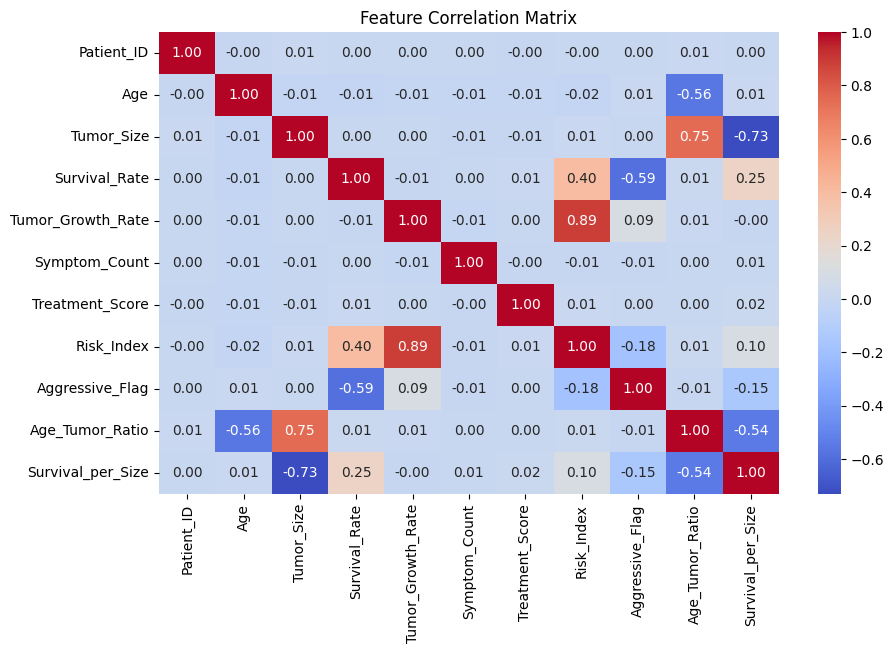

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df_features.select_dtypes(['float64','int64']).corr(),annot=True,cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# - Values close to 1.0 or -1.0 → High correlation (one feature might be removed).
# - Remove features that are highly correlated with each other to avoid redundancy.

# No two features are highly correlated (no values near ±1)
# ✅ No need to drop any numeric features due to multicollinearity

In [19]:
# 🧠 Observation from correlation matrix:
# Risk_Index and Tumor_Growth_Rate = highly correlated (~0.89) ✅
# Age_Tumor_Ratio and Tumor_Size = strong correlation (~0.75) ✅

### **Check Feature Importance Using a Random Forest Model**
- Uses a machine learning model to find the most valuable features.
- Higher importance scores = more significant variables.

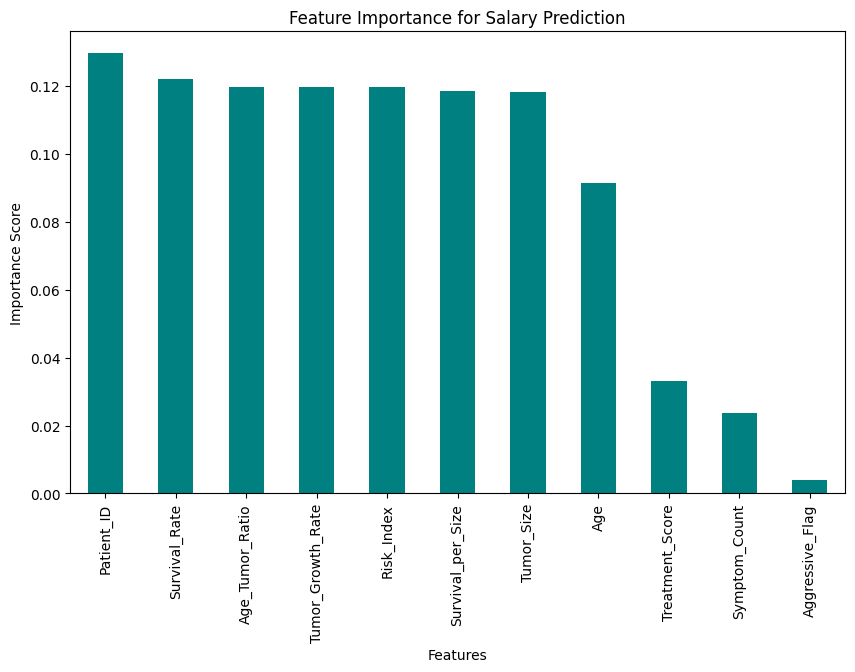

In [20]:
dfc_copy = df_features.copy()
# Encode Tumor_Type
dfc_copy['Tumor_Type_Encoded'] = (dfc_copy['Tumor_Type'] == 'Malignant').astype(int)
# Prepare data (Remove non-numeric columns)
df_importance = dfc_copy.select_dtypes(include=[np.number]).dropna()

# Define Features (X) and Target (y)
X = df_importance.drop(columns=['Tumor_Type_Encoded'])  # Predicting Salary (TotalPay)
y = df_importance['Tumor_Type_Encoded']

# Train a Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get Feature Importance Scores
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot Feature Importance
feature_importance.plot(kind='bar', figsize=(10,6), color='teal')
plt.title("Feature Importance for Salary Prediction")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [21]:
# Final 

df_features.drop(columns=[
    'Patient_ID',             # Identifier only
    'Survival_Rate',          # Covered by Risk_Index & Survival_per_Size
    'Tumor_Growth_Rate',      # Covered by Risk_Index
    'Tumor_Size',             # Covered by Age_Tumor_Ratio
    'Age',                    # Covered by Age_Tumor_Ratio
    'Aggressive_Flag',         # Very low importance
    'Symptom_1', 'Symptom_2', 'Symptom_3' # Covered by Symptom_Combo
], inplace=True, errors='ignore')

In [22]:
# now let's save the cleaned dataset for the ease of further analysis
df_features.to_csv("brain_tumor_selected.csv", index=False)

# **STEP 6: Data Preprocessing**

In [23]:
df_selected = pd.read_csv("brain_tumor_selected.csv")
df_selected.head(3)

,Gender,Tumor_Type,Location,Histology,Stage,Radiation_Treatment,Surgery_Performed,Chemotherapy,Family_History,MRI_Result,Follow_Up_Required,Symptom_Combo,Symptom_Count,Treatment_Score,Risk_Index,Age_Tumor_Ratio,Survival_per_Size,Age_Group
0,Male,Malignant,Temporal,Astrocytoma,III,No,No,No,No,Positive,Yes,Vision Issues_Seizures_Seizures,2,0,5.740627,0.073538,9.371114,Senior
1,Male,Benign,Parietal,Glioblastoma,II,Yes,Yes,Yes,Yes,Positive,Yes,Headache_Headache_Nausea,2,3,100.432248,0.185713,9.373834,Adult
2,Male,Benign,Parietal,Meningioma,I,No,No,No,No,Negative,No,Vision Issues_Headache_Seizures,3,0,88.694786,0.179691,8.275139,Adult


### **Encoding for (Categorical Data)**

In [24]:
# STEP 6.1: One-Hot Encoding for low-cardinality categorical features
one_hot_cols = ['Gender', 'Location', 'Histology', 'Stage', 'Radiation_Treatment',
                'Surgery_Performed', 'Chemotherapy', 'Family_History', 'MRI_Result',
                'Age_Group']

df_selected = pd.get_dummies(df_selected, columns=one_hot_cols, drop_first=True)
df_selected = df_selected.astype({col: int for col in df_selected.select_dtypes('bool').columns})
df_selected.head(3)

,Tumor_Type,Follow_Up_Required,Symptom_Combo,Symptom_Count,Treatment_Score,Risk_Index,Age_Tumor_Ratio,Survival_per_Size,Gender_Male,Location_Occipital,...,Histology_Meningioma,Stage_II,Stage_III,Stage_IV,Radiation_Treatment_Yes,Surgery_Performed_Yes,Chemotherapy_Yes,Family_History_Yes,MRI_Result_Positive,Age_Group_Senior
0,Malignant,Yes,Vision Issues_Seizures_Seizures,2,0,5.740627,0.073538,9.371114,1,0,...,0,0,1,0,0,0,0,0,1,1
1,Benign,Yes,Headache_Headache_Nausea,2,3,100.432248,0.185713,9.373834,1,0,...,0,1,0,0,1,1,1,1,1,0
2,Benign,No,Vision Issues_Headache_Seizures,3,0,88.694786,0.179691,8.275139,1,0,...,1,0,0,0,0,0,0,0,0,0


In [25]:
# STEP 6.2: Frequency Encoding for Symptom_Combo (to avoid too many columns)

symptom_combo_freq = df_selected['Symptom_Combo'].value_counts()
df_selected['Symptom_Combo_Encoded'] = df_selected['Symptom_Combo'].map(symptom_combo_freq)
df_selected.drop(columns=['Symptom_Combo'], inplace=True)

In [26]:
# STEP 6.3: Encoding the target features

df_selected['Tumor_Type_Encoded'] = (df_selected['Tumor_Type'] == 'Malignant').astype(int)
# Malignant → 1
# Benign → 0
df_selected['Follow_Up_Encoded'] = (df_selected['Follow_Up_Required'] == 'Yes').astype(int)

# dropping the original features before modeling
df_selected.drop(columns=['Tumor_Type', 'Follow_Up_Required'], inplace=True)

### **Scaling for (Numerical Data)**

In [27]:
scaler = MinMaxScaler()
scaled_features = ['Symptom_Count', 'Treatment_Score', 'Symptom_Combo_Encoded',
                'Risk_Index', 'Age_Tumor_Ratio', 'Survival_per_Size']
df_selected[scaled_features] = scaler.fit_transform(df_selected[scaled_features])
df_selected.head(3)

,Symptom_Count,Treatment_Score,Risk_Index,Age_Tumor_Ratio,Survival_per_Size,Gender_Male,Location_Occipital,Location_Parietal,Location_Temporal,Histology_Glioblastoma,...,Stage_IV,Radiation_Treatment_Yes,Surgery_Performed_Yes,Chemotherapy_Yes,Family_History_Yes,MRI_Result_Positive,Age_Group_Senior,Symptom_Combo_Encoded,Tumor_Type_Encoded,Follow_Up_Encoded
0,0.5,0.0,0.005214,0.136911,0.034397,1,0,0,1,0,...,0,0,0,0,0,1,1,0.421875,1,1
1,0.5,1.0,0.327562,0.365885,0.034414,1,0,1,0,1,...,0,1,1,1,1,1,0,0.000000,0,1
2,1.0,0.0,0.287605,0.353594,0.027407,1,0,1,0,0,...,0,0,0,0,0,0,0,0.718750,0,0


In [28]:
# Save scaler for deployment
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [29]:
df_selected.to_csv("brain_tumor_preprocessing.csv",index=False)

# **STEP 7: Modeling**

In [45]:
df_final = pd.read_csv("brain_tumor_preprocessing.csv")
df_final.head(3)

,Symptom_Count,Treatment_Score,Risk_Index,Age_Tumor_Ratio,Survival_per_Size,Gender_Male,Location_Occipital,Location_Parietal,Location_Temporal,Histology_Glioblastoma,Histology_Medulloblastoma,Histology_Meningioma,Stage_II,Stage_III,Stage_IV,Radiation_Treatment_Yes,Surgery_Performed_Yes,Chemotherapy_Yes,Family_History_Yes,MRI_Result_Positive,Age_Group_Senior,Symptom_Combo_Encoded,Tumor_Type_Encoded,Follow_Up_Encoded
0,0.5,0.0,0.005214,0.136911,0.034397,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0.421875,1,1
1,0.5,1.0,0.327562,0.365885,0.034414,1,0,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0.000000,0,1
2,1.0,0.0,0.287605,0.353594,0.027407,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.718750,0,0


### **STEP 7.1: Modeling - Tumor_Type_Encoded**

In [46]:
# Define Features (X) and Target (y)
X = df_final.drop(columns=['Tumor_Type_Encoded', 'Follow_Up_Encoded'])  # ✅ Drop both targets
y = df_final['Tumor_Type_Encoded']  # Predicting Tumor Type of each patient

In [47]:
# 1️⃣ Training Set (70%) → Used to train the model.
# 2️⃣ Validation Set (15%) → Used to tune the model (hyperparameters).
# 3️⃣ Test Set (15%) → Used to evaluate the final model performance.

# Split into Train (70%), Validation (15%), and Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
# random_states ensures that every time we run the code, we get the same random split.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [48]:
# to avoid data leakage and ensure that our model generalizes well.
scaler_trained = MinMaxScaler()
scaler_trained.fit(X_train)

# ✅ Transform validation and test sets (AFTER fitting on training data)
# changing scaled name to avoid data leakage
X_train_scaled = scaler_trained.transform(X_train)
X_val_scaled = scaler_trained.transform(X_val)
X_test_scaled = scaler_trained.transform(X_test)

# ✅ Save the scaler for later use
joblib.dump(scaler_trained, "scaler.pkl")
print("Scaler saved successfully!")

Scaler saved successfully!


In [49]:
# training with different models

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=30, max_features="sqrt", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate all models
model_summaries = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = round(accuracy_score(y_test, y_pred),4)
    cm = confusion_matrix(y_test, y_pred)
    summary = {
        "Model" : name,
        "Accuracy" : accuracy,
        "confusion Matrix": f"{cm.tolist()}" 
    }
    
    model_summaries.append(summary)

results_df = pd.DataFrame(model_summaries)
results_df.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy,confusion Matrix
2,Decision Tree,0.5057,"[[771, 731], [752, 746]]"
5,SVM (Linear Kernel),0.5037,"[[769, 733], [756, 742]]"
0,Logistic Regression,0.5010,"[[731, 771], [726, 772]]"
1,Random Forest,0.5010,"[[852, 650], [847, 651]]"
4,AdaBoost,0.4997,"[[731, 771], [730, 768]]"
3,Gradient Boosting,0.4880,"[[667, 835], [701, 797]]"
6,KNN,0.4840,"[[754, 748], [800, 698]]"


### **STEP 7.2: Modeling - Follow_Up_Encoded**

In [39]:
# ✅ Drop both targets before scaling (scaler was fit without these)
X_fu = df_final.drop(columns=['Tumor_Type_Encoded', 'Follow_Up_Encoded'])  # 🔥 KEY FIX
y_fu = df_final['Follow_Up_Encoded']


In [40]:
# ✅ Split into Train, Validation, and Test Sets
X_train_fu, X_temp_fu, y_train_fu, y_temp_fu = train_test_split(X_fu, y_fu, test_size=0.30, random_state=42)
X_val_fu, X_test_fu, y_val_fu, y_test_fu = train_test_split(X_temp_fu, y_temp_fu, test_size=0.50, random_state=42)

In [41]:
# ✅ Scale features using previously fitted scaler
X_train_fu_scaled = scaler_trained.transform(X_train_fu)
X_val_fu_scaled = scaler_trained.transform(X_val_fu)
X_test_fu_scaled = scaler_trained.transform(X_test_fu)

In [ ]:

# Define classification models
models_fu = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=30, max_features="sqrt", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each model
model_summaries_fu = []

for name, model in models_fu.items():
    model.fit(X_train_fu_scaled, y_train_fu)
    y_pred_fu = model.predict(X_test_fu_scaled)
    accuracy = round(accuracy_score(y_test_fu, y_pred_fu), 4)
    cm = confusion_matrix(y_test_fu, y_pred_fu)
    
    model_summaries_fu.append({
        "Model": name,
        "Accuracy": accuracy,
        "Confusion Matrix": f"{cm.tolist()}"
    })

# Show results
results_fu_df = pd.DataFrame(model_summaries_fu)
results_fu_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Confusion Matrix
5,SVM (Linear Kernel),0.5087,"[[380, 1109], [365, 1146]]"
0,Logistic Regression,0.5080,"[[591, 898], [578, 933]]"
2,Decision Tree,0.5067,"[[736, 753], [727, 784]]"
3,Gradient Boosting,0.4997,"[[497, 992], [509, 1002]]"
4,AdaBoost,0.4990,"[[177, 1312], [191, 1320]]"
1,Random Forest,0.4967,"[[783, 706], [804, 707]]"


### **STEP 7.3: Comprehensive Model Benchmarking with GridSearchCV**

In [55]:
# Define models and their hyperparameter grids
models_grid = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=9),
        'param_grid': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs'],
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
        }
    },
    'SVC': {
        'model': SVC(probability=True),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
        }
    },
    'GradientBoostingClassifier': {
        'model': GradientBoostingClassifier(),
        'param_grid': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 4],
        }
    },
    'XGBClassifier': {
        'model': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'param_grid': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 4],
        }
    }
}

# Train and evaluate models
summary_list = []

for name, model_info in models_grid.items():
    model = model_info['model']
    param_grid = model_info['param_grid']
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    best_model.fit(X_train_scaled, y_train)
    y_pred = best_model.predict(X_test_scaled)

    summary_list.append({
        "Model": name,
        "Best Params": grid_search.best_params_,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1 Score": round(f1_score(y_test, y_pred), 4)
    })

# Create DataFrame and display
summary_df = pd.DataFrame(summary_list).sort_values(by='Accuracy', ascending=False)
summary_df

,Model,Best Params,Accuracy,Precision,Recall,F1 Score
5,GradientBoostingClassifier,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.5050,0.5029,0.7510,0.6024
2,SVC,"{'C': 0.1, 'kernel': 'rbf'}",0.5033,0.5028,0.4833,0.4929
3,DecisionTreeClassifier,"{'max_depth': 30, 'min_samples_leaf': 4, 'min_...",0.5020,0.5016,0.4312,0.4637
0,LogisticRegression,"{'C': 1, 'solver': 'liblinear'}",0.5007,0.5000,0.5134,0.5066
6,XGBClassifier,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.4997,0.4990,0.5093,0.5041
4,RandomForestClassifier,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.4920,0.4915,0.5020,0.4967
1,KNeighborsClassifier,{'n_neighbors': 3},0.4883,0.4871,0.4680,0.4774


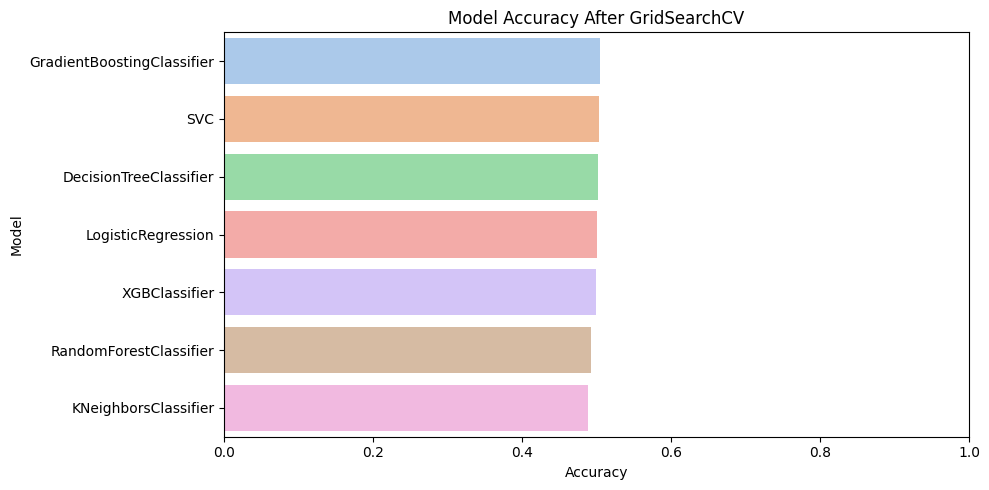

In [56]:
plt.figure(figsize=(10, 5))
sns.barplot(y=summary_df['Model'], x=summary_df['Accuracy'], palette='pastel')
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy After GridSearchCV")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# **STEP 8: Model Evaluation & Optimization**

### **STEP 8.1: Evaluation - Tumor_Type_Encoded**

In [43]:
# Train baseline model
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train_scaled, y_train)
y_pred_base = rf_baseline.predict(X_test_scaled)
y_pred_base

array([0, 0, 1, ..., 0, 1, 1], shape=(3000,))

In [44]:
# Tune model
param_grid = {
    'n_estimators': [30, 50, 100],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)
rf_optimized = random_search.best_estimator_
y_pred_opt = rf_optimized.predict(X_test_scaled)
y_pred_opt

array([1, 0, 1, ..., 1, 1, 0], shape=(3000,))

In [45]:
# ✅ Evaluate both base and optimized model

def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": round(accuracy_score(y_true, y_pred), 4),
        "Precision": round(precision_score(y_true, y_pred), 4),
        "Recall": round(recall_score(y_true, y_pred), 4),
        "F1 Score": round(f1_score(y_true, y_pred), 4),
        "Confusion Matrix": confusion_matrix(y_true, y_pred).tolist()
    }
    
# Compile evaluation results
evaluation_df = pd.DataFrame([
    evaluate_model("Random Forest (Baseline)", y_test, y_pred_base),
    evaluate_model("Random Forest (Optimized)", y_test, y_pred_opt)
])

evaluation_df

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Random Forest (Baseline),0.4857,0.4840,0.4533,0.4681,"[[778, 724], [819, 679]]"
1,Random Forest (Optimized),0.4890,0.4884,0.4933,0.4909,"[[728, 774], [759, 739]]"


### **STEP 8.2: Evaluation - Follow_Up_Encoded**

In [46]:
# 🧪 1. Train Baseline Model for Follow-Up
rf_baseline_fu = RandomForestClassifier(random_state=42)
rf_baseline_fu.fit(X_train_fu_scaled, y_train_fu)
y_pred_base_fu = rf_baseline_fu.predict(X_test_fu_scaled)

In [47]:
# 🔧 2. Tune Hyperparameters
# Define tuning grid
param_grid_fu = {
    'n_estimators': [30, 50, 100],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Random search for best hyperparameters
random_search_fu = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid_fu,
    n_iter=10,
    cv=3,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

random_search_fu.fit(X_train_fu_scaled, y_train_fu)
rf_optimized_fu = random_search_fu.best_estimator_
y_pred_opt_fu = rf_optimized_fu.predict(X_test_fu_scaled)

In [48]:
# 📊 3. Evaluate Models (Baseline vs. Optimized)
# Define same evaluation function
def evaluate_model_fu(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": round(accuracy_score(y_true, y_pred), 4),
        "Precision": round(precision_score(y_true, y_pred), 4),
        "Recall": round(recall_score(y_true, y_pred), 4),
        "F1 Score": round(f1_score(y_true, y_pred), 4),
        "Confusion Matrix": confusion_matrix(y_true, y_pred).tolist()
    }

# Compile results
evaluation_df_fu = pd.DataFrame([
    evaluate_model_fu("Random Forest (Baseline)", y_test_fu, y_pred_base_fu),
    evaluate_model_fu("Random Forest (Optimized)", y_test_fu, y_pred_opt_fu)
])

evaluation_df_fu

,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Random Forest (Baseline),0.4973,0.5010,0.5109,0.5059,"[[720, 769], [739, 772]]"
1,Random Forest (Optimized),0.5090,0.5121,0.5334,0.5225,"[[721, 768], [705, 806]]"


# **Step 9: Deployment & Interpretation**

### **Simulate Predictions for Tumor Type** 

In [36]:
# ✅ We will save the optimized Random Forest model so it can be reused later.
# Save the optimized Random Forest classifier
joblib.dump(rf_optimized, "brain_tumor_prediction_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# ✅ Let's simulate deployment by loading the model and making salary predictions for a new employee.

# Load model and scaler
loaded_model = joblib.load("brain_tumor_prediction_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

In [ ]:
new_patients = X_test.iloc[:5]  # Already a proper DataFrame

# Scale the new patient data
new_patients_scaled = loaded_scaler.transform(new_patients)

# Make predictions
predictions = loaded_model.predict(new_patients_scaled)
probabilities = loaded_model.predict_proba(new_patients_scaled)

# Display results
for i in range(len(new_patients)):
    pred_class = "Malignant" if predictions[i] == 1 else "Benign"
    prob_benign = round(probabilities[i][0], 4)
    prob_malignant = round(probabilities[i][1], 4)

    print(f"🧪 Sample {i+1}")
    print(f"Prediction: {pred_class}")
    print(f"Probability (Benign, Malignant): ({prob_benign}, {prob_malignant})")
    print("-" * 40)

🧪 Sample 1
Prediction: Benign
Probability (Benign, Malignant): (0.5641, 0.4359)
----------------------------------------
🧪 Sample 2
Prediction: Benign
Probability (Benign, Malignant): (0.5514, 0.4486)
----------------------------------------
🧪 Sample 3
Prediction: Malignant
Probability (Benign, Malignant): (0.4493, 0.5507)
----------------------------------------
🧪 Sample 4
Prediction: Malignant
Probability (Benign, Malignant): (0.4428, 0.5572)
----------------------------------------
🧪 Sample 5
Prediction: Benign
Probability (Benign, Malignant): (0.6383, 0.3617)
----------------------------------------


### **Simulate Predictions for FollowUp Required**

In [49]:
# ✅ Save the optimized Follow-Up model
joblib.dump(rf_optimized_fu, "followup_prediction_model.pkl")
print("Follow-Up model saved successfully!")

Follow-Up model saved successfully!


In [50]:
# ✅ Load model and scaler (if starting fresh)
loaded_fu_model = joblib.load("followup_prediction_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")  # Already fitted earlier

In [51]:

# ✅ Use first 5 patients from test set
new_patients_fu = X_test_fu.iloc[:5]

# ✅ Scale the new patient data
new_patients_fu_scaled = loaded_scaler.transform(new_patients_fu)

# ✅ Make predictions
predictions_fu = loaded_fu_model.predict(new_patients_fu_scaled)
probabilities_fu = loaded_fu_model.predict_proba(new_patients_fu_scaled)

# ✅ Display results
for i in range(len(new_patients_fu)):
    pred_class = "Follow-Up Required" if predictions_fu[i] == 1 else "No Follow-Up"
    prob_no = round(probabilities_fu[i][0], 4)
    prob_yes = round(probabilities_fu[i][1], 4)

    print(f"🧪 Patient {i+1}")
    print(f"Prediction: {pred_class}")
    print(f"Probability (No Follow-Up, Follow-Up): ({prob_no}, {prob_yes})")
    print("-" * 40)

🧪 Patient 1
Prediction: Follow-Up Required
Probability (No Follow-Up, Follow-Up): (0.4883, 0.5117)
----------------------------------------
🧪 Patient 2
Prediction: Follow-Up Required
Probability (No Follow-Up, Follow-Up): (0.4722, 0.5278)
----------------------------------------
🧪 Patient 3
Prediction: Follow-Up Required
Probability (No Follow-Up, Follow-Up): (0.4445, 0.5555)
----------------------------------------
🧪 Patient 4
Prediction: Follow-Up Required
Probability (No Follow-Up, Follow-Up): (0.472, 0.528)
----------------------------------------
🧪 Patient 5
Prediction: Follow-Up Required
Probability (No Follow-Up, Follow-Up): (0.3768, 0.6232)
----------------------------------------
